# Nivell 1
- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [61]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
conn = pymysql.connect(
    host='remotemysql.com',
    port=int(3306),
    user="usuario",
    passwd='contraseña',
    db="g7hoQ1BCxy",
    charset='utf8mb4')


In [34]:
print(conn)

In [42]:
# Listamos las tablas
micursor = conn.cursor()

micursor.execute("SHOW TABLES")

for x in micursor:
  print(x)

('departments',)
('dept_emp',)
('dept_manager',)
('employees',)
('salaries',)
('titles',)


# Nivell 2

- Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe

Cargos los datos de la tabla employees en dataframe

In [14]:
df = pd.read_sql_query("SELECT * FROM employees",
    conn)
df.tail(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
300014,499990,1963-11-03,Khaled,Kohling,M,1985-10-10
300015,499991,1962-02-26,Pohua,Sichman,F,1989-01-12
300016,499992,1960-10-12,Siamak,Salverda,F,1987-05-10
300017,499993,1963-06-04,DeForest,Mullainathan,M,1997-04-07
300018,499994,1952-02-26,Navin,Argence,F,1990-04-24
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13
300023,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30


Creo Df con los salarios de los empleado

In [46]:
df2 = pd.read_sql_query("select e.*,s.salary from employees e join salaries s on e.emp_no=s.emp_no",
    conn)
df.tail(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
300014,499990,1963-11-03,Khaled,Kohling,M,1985-10-10
300015,499991,1962-02-26,Pohua,Sichman,F,1989-01-12
300016,499992,1960-10-12,Siamak,Salverda,F,1987-05-10
300017,499993,1963-06-04,DeForest,Mullainathan,M,1997-04-07
300018,499994,1952-02-26,Navin,Argence,F,1990-04-24
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13
300023,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30


Creo df con los salarios y los cargos

In [49]:
df3 = pd.read_sql_query("select e.*,s.salary, t.title, t.from_date,t.to_date from employees e join salaries s on e.emp_no=s.emp_no join titles t on t.emp_no=e.emp_no",
    conn)
df.head(10)



,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


# Nivell 3
- Exercici 3

Genera algun gràfic que resumeixi les dades. 

In [50]:
df3.shape

(3098532, 10)

In [52]:
df3.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,title,from_date,to_date
0,109205,1954-08-14,Shrikanth,Kuzuoka,M,1988-09-07,54406,Senior Staff,1995-09-08,9999-01-01
1,109205,1954-08-14,Shrikanth,Kuzuoka,M,1988-09-07,55107,Senior Staff,1995-09-08,9999-01-01
2,109205,1954-08-14,Shrikanth,Kuzuoka,M,1988-09-07,55305,Senior Staff,1995-09-08,9999-01-01
3,109205,1954-08-14,Shrikanth,Kuzuoka,M,1988-09-07,59484,Senior Staff,1995-09-08,9999-01-01
4,109205,1954-08-14,Shrikanth,Kuzuoka,M,1988-09-07,54406,Staff,1988-09-07,1995-09-08


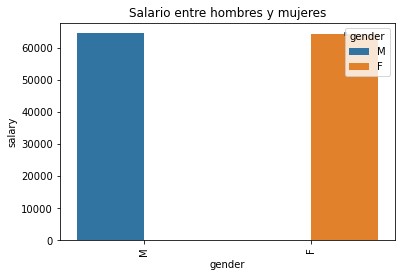

In [59]:
chart = sns.barplot(data = df3,x = 'gender', y = 'salary', hue = 'gender')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title ('Salario entre hombres y mujeres')
plt.show()

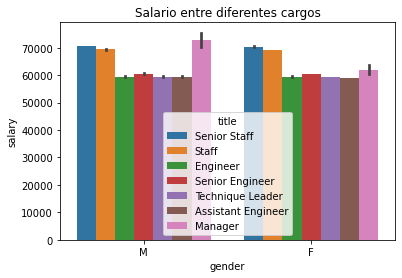

In [65]:
chart2 = sns.barplot(data = df3,x = 'gender', y = 'salary', hue = 'title')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title ('Salario entre diferentes cargos')
plt.show()

Text(0.5, 1.0, 'Salario por diferentes cargos')

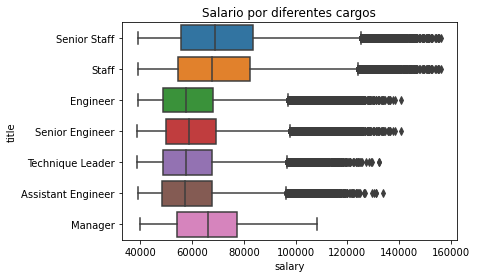

In [64]:
sns.boxplot(data=df3, x='salary', y='title')
plt.title ('Salario por diferentes cargos')